# 3. College Admission Classification (Supervised Learning)

## Step 1: Load data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Admission_Predict.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its info
data_info = data.info()
first_rows = data.head()

data_info, first_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       400 non-null    int64  
 1   sop       400 non-null    float64
 2   cgpa      400 non-null    float64
 3   admitted  400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


(None,
    gre  sop  cgpa  admitted
 0  337  4.5  9.65         1
 1  324  4.0  8.87         1
 2  316  3.0  8.00         1
 3  322  3.5  8.67         1
 4  314  2.0  8.21         0)

## Step 2: EDA

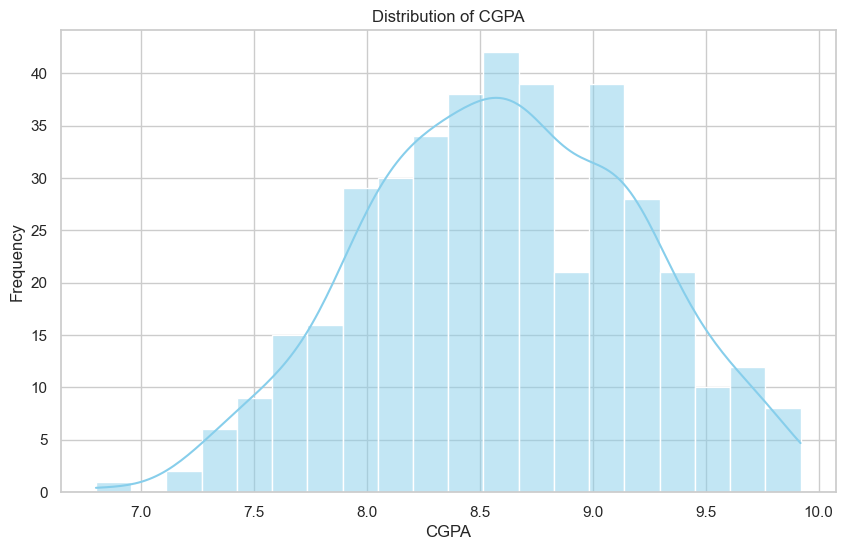

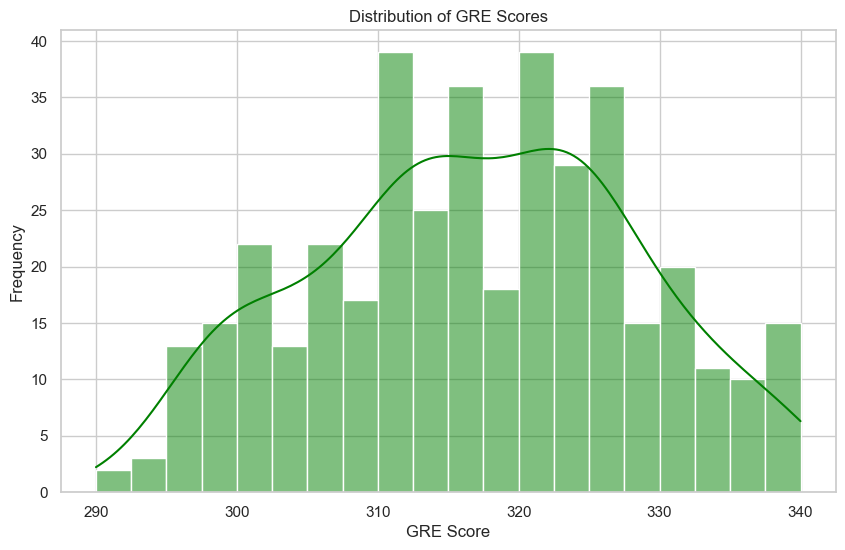

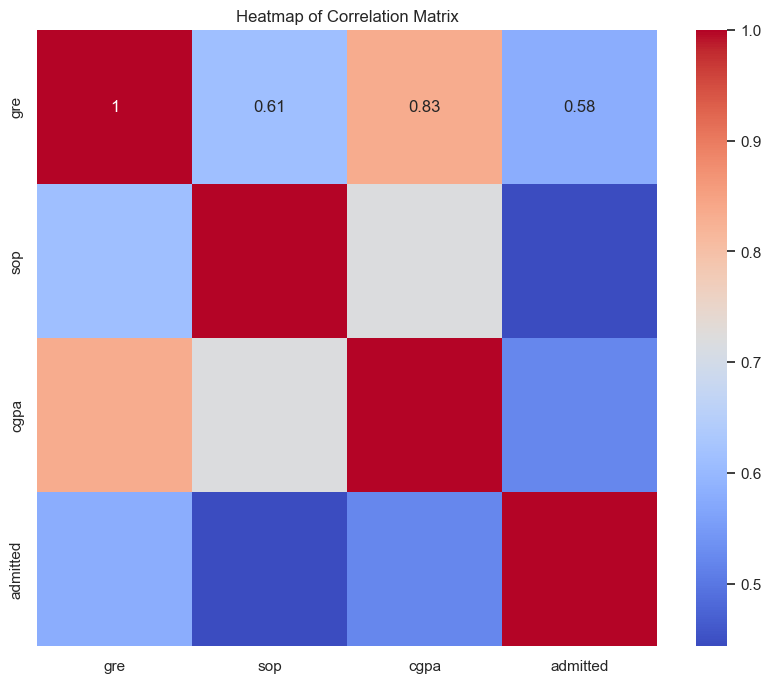

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# EDA Chart 1: Distribution of CGPA
plt.figure(figsize=(10, 6))
sns.histplot(data['cgpa'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# EDA Chart 2: Distribution of GRE Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['gre'], kde=True, bins=20, color='green')
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.show()

# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


1. Distribution of CGPA: This chart shows the distribution of CGPA scores among students. The CGPA scores are mostly distributed between 8 and 10, with the highest frequency around 8 to 9.

2. Distribution of GRE Scores: This histogram displays the distribution of GRE scores. GRE scores in this dataset range broadly from around 290 to 340, with a concentration of scores between 310 and 330.

3. Heatmap of Correlation Matrix: The heatmap visualizes the correlation between different variables in the dataset. The correlation values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. From the heatmap, we can see how each variable correlates with the others, including their relationship with the admission decision (admitted).

## Step 3: Model Development and Comparison

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Preparing the data
X = data.drop('admitted', axis=1)
y = data['admitted']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to hold evaluation metrics
evaluation_metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    evaluation_metrics["Model"].append(name)
    evaluation_metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    evaluation_metrics["Precision"].append(precision_score(y_test, y_pred))
    evaluation_metrics["Recall"].append(recall_score(y_test, y_pred))
    evaluation_metrics["F1 Score"].append(f1_score(y_test, y_pred))

# Convert metrics to DataFrame for display
evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8000,0.878049,0.765957,0.818182
1,SVM,0.8125,0.900000,0.765957,0.827586
2,Random Forest,0.7375,0.809524,0.723404,0.764045


## Step 4: Model Evaluation (ROC Curve)

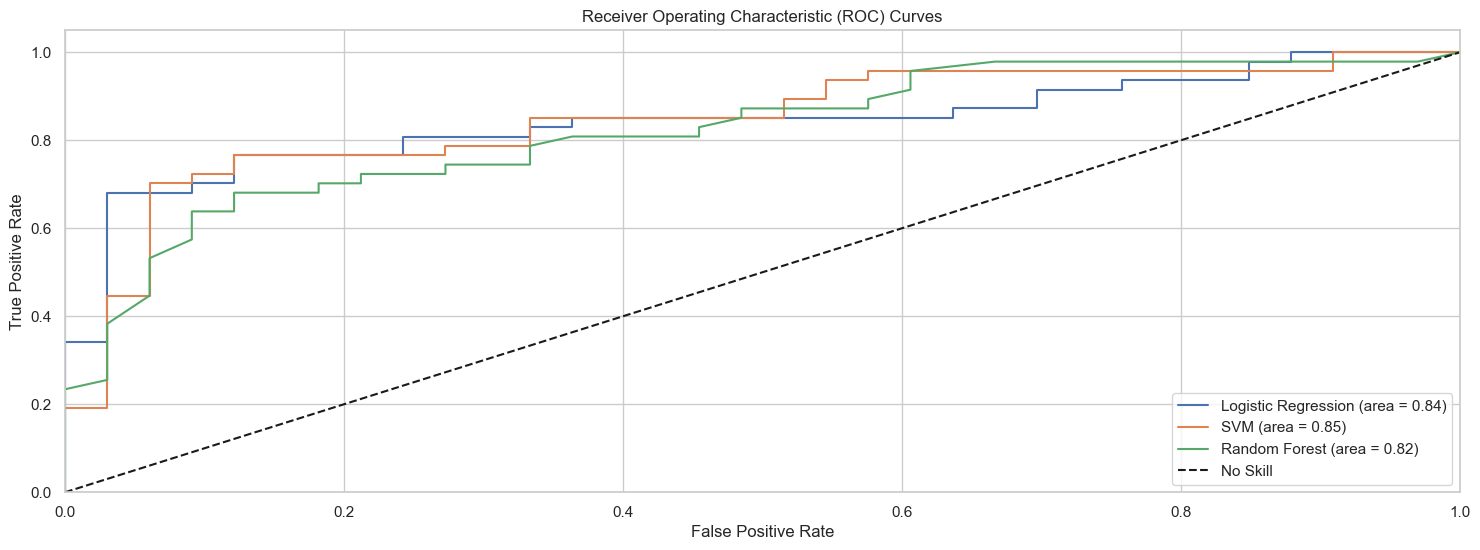

"The ROC curves display the diagnostic ability of the classification models as their discrimination threshold is varied. The area under the curve (AUC) represents the model's ability to distinguish between the classes, where a value of 1.0 represents a perfect model, and a value of 0.5 represents a model with no discriminative ability. All models demonstrate good discriminative ability, with AUC values significantly above 0.5, indicating that they can distinguish between admitted and not admitted students effectively. The SVM model, with the highest AUC, shows the best performance among the three."

In [8]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Plot ROC curves
plt.figure(figsize=(18, 6))

# Dictionary to hold ROC curve data
roc_data = {}

for name, model in models.items():
    # Compute probabilities
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store ROC curve data
    roc_data[name] = (fpr, tpr, roc_auc)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Prepare summary of the ROC curves
roc_summary = "The ROC curves display the diagnostic ability of the classification models as their discrimination threshold is varied. The area under the curve (AUC) represents the model's ability to distinguish between the classes, where a value of 1.0 represents a perfect model, and a value of 0.5 represents a model with no discriminative ability. All models demonstrate good discriminative ability, with AUC values significantly above 0.5, indicating that they can distinguish between admitted and not admitted students effectively. The SVM model, with the highest AUC, shows the best performance among the three."

roc_summary
